# Code First, Math Later
## Learning Neural Nets Through Implementation and Examples
### Kyle Shaffer

# Overall Approach
* Many people start with textbooks to learn theory behind deep learning before moving on to application
* Fundamental texts often use math as their main communication tool
* Mathematics and formal notation can be abstract and difficult to understand

# Overall Approach
* We can instead combine fundamentals with examples in an iterative approach
* Recent deep learning libraries have made prototyping much easier, but these tools can also be used to learn about neural networks through implementation
* We can learn about DL techniques through "picking apart" existing software

# Talk Overview
* Overview of Deep Learning and Applications
* Introduction to Keras API
* Implementing Neural Networks - CNN and LSTM
* Beyond the Black Box: Investigating Feature Extraction Layers
* Conclusion

# Quick Intro to Deep Learning

# Feedforward Networks

# Feedforward Networks
* __Deep learning__: application of neural networks with many layers to ML problems
* Hidden layers use previous layer's output as their input
* Deeper layers in these networks automatically identify more general / abstract features
* __Feedforward nets__: prototypical example of deep networks

<p align="center">
<img src="figs/neural-network.png"/>
</p>

# Feedforward Networks
* We can think of hidden layers as "feature extractors" or "data transformers"
* We apply these transformations through "activation functions", which link layers together
* Learning representations - different way of thinking from traditional process of manually engineering features before feeding to model

# Feedforward Networks

<tr>
    <td> <img src="figs/neural-network.png" alt="" style="width: 700px;"/> </td>
    <td> <img src="figs/mlp_code.png" alt="" style="width: 700px;"/> </td>
</tr>

# Feedforward Networks
* Building block for all other types of networks
* Help us understand other architectures at a high level

# Convolutional Networks

# Convolutional Networks
* Often used in image tasks - object detection, scene classification
* **Convolution**: idea of using a "sliding filter" to aggregate features over an image
* Deeper convolutional layers learn more general / abstract concepts

# Convolutional Networks
![conv-layers](figs/conv_layers.png)

## What's a convolution?

In [10]:
import numpy as np

edge_filter = np.array([
    [1, 0, -1], 
    [0, 0, 0],
    [-1, 0, 1]
])

In [82]:
# Convolution function
# Here, we're detecting edges in an image

def convolve(input_image, kernel):
    padded_image = np.pad(input_image, (1, 1), 'constant') # 1-pixel padding added to image
    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]
    
    convolved_image = np.zeros_like(input_image) # Store the convolved image in NumPy array
    for i in xrange(padded_image.shape[0] - kernel_width + 1):
        for j in xrange(padded_image.shape[1] - kernel_height + 1):
            # Extract an image chunk of size kernel_width x kernel_height
            temp_array = padded_image[i: i+kernel_width, j: j+kernel_height]
            conv_val = np.sum(temp_array * kernel)
            # Clip values outside the 0 - 255 range
            if conv_val < 0:
                push_val = 0
            elif conv_val > 255:
                push_val = 255
            else:
                push_val = conv_val
            convolved_image[i, j] = push_val
    return convolved_image

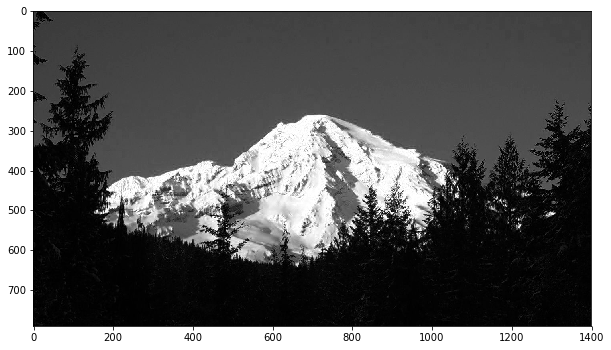

In [12]:
# Let's read in an image and view it
from PIL import Image
import matplotlib.pyplot as plt
% matplotlib inline

img = np.array(Image.open("figs/rainier.png"))
single_channel_img = img[:, :, 0]
plt.figure(figsize=(10, 6))
plt.imshow(single_channel_img, plt.get_cmap('gray'))

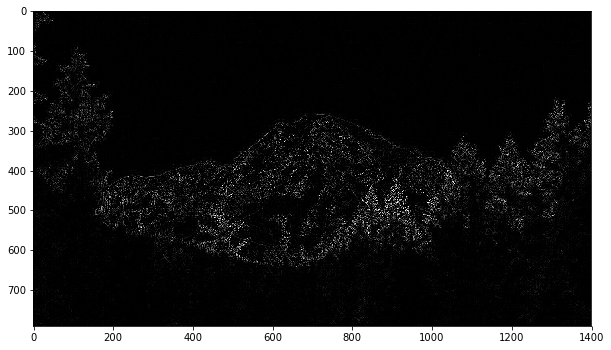

In [88]:
img_edges = convolve(single_channel_img, edge_filter)
plt.figure(figsize=(10, 6))
plt.imshow(img_edges, plt.get_cmap('gray'))

# Convolutional Networks
* Models that use convolutions as a way to construct summaries of local patches of images
* Learn to represent hierarchies of image features that are good for prediction
* Popular in computer vision, also applicable in NLP

# Recurrent Networks

# Recurrent Networks
* Capture sequential dependencies in data
* Often used for language / text data or time series
* Can take very long time to train, optimization can be tricky with long sequences

![lstm-unrolled](figs/lstm_unrolled.png)
Source: http://colah.github.io/posts/2015-08-Understanding-LSTMs/

# Recurrent Networks
* Learn a "cell state" that represents relationships between items in input sequence
* These come in several flavors (GRU, LSTM, Bidirectional RNN)

![inside-lstm](figs/inside_lstm.png)
Source: http://colah.github.io/posts/2015-08-Understanding-LSTMs/

# Recurrent Networks
* Lots of progress applying to text
* Text classification, POS-tagging, NER, machine translation
* Can be used as generative models

# Introduction to Keras

## Keras Homepage
https://keras.io/
![keras-homepage](figs/keras_homepage.png)

# Introduction to Keras
* Abstracts implementation details and provides modular design
* Allows for quick prototyping
* Think in terms of "stacking layers"

In [ ]:
# General pattern of writing Keras models

# (1) Start a "container" of model layers
# (2) Add initial input and feature extraction layers
# (3) Link layers together with activation functions
# (4) Finally add output layer for final predictions

In [ ]:
# (1) Start a "container" of model layers
model = Sequential()

# (2) Add initial input and feature extraction layers
model.add(Dense(100))
# (3) Link layers together with activation functions
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))

# (4) Finally add output layer for final predictions
model.add(Dense(1))
model.add(Activation('sigmoid'))

# Implementing Neural Nets: Examples

# CNN for Object Recognition

## Keras Datasets
https://keras.io/datasets/
![Datsets](figs/keras_datasets.png)

In [14]:
# Let's load the data we'll use
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load in data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Need to create one-hot matrix of labels 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print "Training data:", X_train.shape
print "Training labels:", y_train.shape

Training data: (50000, 32, 32, 3)
Training labels: (50000, 10)


(32, 32, 3)


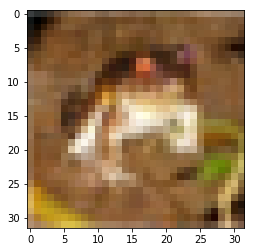

In [15]:
# Input tensor is just a collection of 3D tensors
# Each is an image with 3 color channels
# Min-max normalization
X_train = np.array([img / 255. for img in X_train])
first_img = X_train[0, :, :, :]
print first_img.shape
# A frog I think?
plt.imshow(first_img)

In [16]:
# Imports for the model
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten
from keras.layers import Conv2D, Dense, MaxPooling2D

In [25]:
# Instantiate our model container
model = Sequential()
# First block of convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3, 3),
                 padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [26]:
# More convolution feature extraction layers
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [28]:
# Flatten extracted features to a vector and pass to dense layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
# Use `softmax` as our activation since we're predicting 10 classes
model.add(Activation('softmax'))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=['accuracy'])

In [ ]:
# Train!
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
25000/25000 [==============================] - 249s - loss: 1.7588 - acc: 0.3604     

## Convolutional Networks
* We can rely on performance metrics to assess model
* Sometimes we need more nuanced debugging options
* Image networks lend themselves nicely to qualitative exploration
* Let's visualize model confidence on individual images

In [42]:
def visualize_predictions(model, img):
    prediction_img = np.expand_dims(img, axis=0)
    classes = range(10)
    class_names = ['airplane', 'car', 'bird', 'cat',
                  'deer', 'dog', 'frog', 'horse', 'ship',
                  'truck']
    # Get probability distribution over image classes
    probabilities = model.predict(prediction_img)[0]
    plt.figure(figsize=(10, 6))
    plt.subplot(121)
    # Show original image
    plt.imshow(img)
    plt.subplot(122)
    # Plot probability for each class
    plt.bar(classes, probabilities, align="center")
    plt.xticks(classes, class_names, rotation="vertical")
    plt.show()

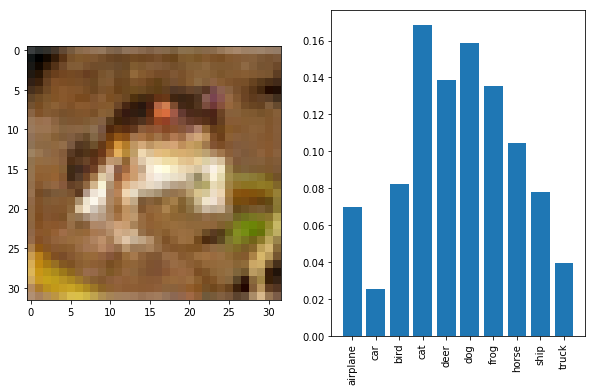

In [47]:
# How does our model do on our first image?
# We've got some work to do...
visualize_predictions(model=model, img=first_img)

## Convolutional Nets - Going Forward
* Add convolutinal layers for deeper nets (if you have compute power)
* Different optimizers and learning rates
* Confusion matrices to understand model mistakes
* Use output probabilities and above plotting function to home in on predictions where classifier is not confident

# LSTM for Document Classification

# LSTM for Document Classification
* Data: tweets that mention disaster-related keywords
* Social media text is noisy - we can't be sure all tweets are acutally about disasters
* Binary prediction task: separate tweets that are actually about disasters (relevant) from those that are not (irrelevant)

In [33]:
import pandas as pd

# Read in data as CSV
# Original dataset available via Crowd Flower
data_path = "../data/socialmedia-disaster-tweets.csv"
df = pd.read_csv(data_path)
print df.shape
df.head()

(10860, 2)


,text,label
0,Just happened a terrible car crash,Relevant
1,Our Deeds are the Reason of this #earthquake M...,Relevant
2,"Heard about #earthquake is different cities, s...",Relevant
3,"there is a forest fire at spot pond, geese are...",Relevant
4,Forest fire near La Ronge Sask. Canada,Relevant


In [34]:
# We'll use `label` attribute as our Relevant / Not Relevant label
# Let's look at the distribution of these labels
df.label.value_counts()

Not Relevant    6187
Relevant        4673
Name: label, dtype: int64

In [36]:
# We need to make numerical labels for our model to understand
# Let's make relevant = 1, not relevant = 0
# Initialize everyting to 0, flip `Relevant` label to 1
df['int_label'] = 0
df.loc[df.label == 'Relevant', 'int_label'] = 1
df.head()

,text,label,int_label
0,Just happened a terrible car crash,Relevant,1
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1
2,"Heard about #earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,Forest fire near La Ronge Sask. Canada,Relevant,1


In [77]:
# Text Processing
X_text = df.text.tolist()
X_text[:10]

['Just happened a terrible car crash',
 'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California ',
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ',
 '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires',
 'Apocalypse lighting. #Spokane #wildfires']

In [78]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Assign our integer labels to variable
y = df.int_label.values

# Tokenize our text - let's only work with the 10K most frequent words
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_text) 
sequences = tokenizer.texts_to_sequences(X_text)
X_padded = pad_sequences(sequences)
print "Shape of input sequences:", X_padded.shape
print "First element of data:", X_padded[0]

Shape of input sequences: (10860, 32)
First element of data: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0   32  821    5 1586
  131   97]


## LSTM's - Working with Sequences
* Each document is transformed into a sequence of integers
* Each integer in each document can be thought of as a "word ID"
* Since not all documents are same length, we prepend each vector with zeros to the max. document length

In [79]:
# Data is in the correct format - now we can build our model
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, LSTM

model = Sequential()
# Learn embeddings for words during training
model.add(Embedding(input_dim=len(tokenizer.word_index), output_dim=100))
# LSTM layer with 64 units
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# Different loss - since predicting only
# two classes, we need binary loss
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Train!
model.fit(X_padded, y, epochs=10, batch_size=32)

Epoch 1/10
10860/10860 [==============================] - 78s - loss: 0.5007 - acc: 0.7550      

## LSTM for Text - Going Forward
* Different recurrent units (LSTM, GRU, vanilla RNN)
* Text processing: should we treat hashtags like other tokens? Remove?
* Pre-trained embeddings in your embedding layer (Word2Vec vs. Glove)

# Beyond the Black Box: Investigating Feature Extraction Layers

## Architecture Debugging
* Often we'll want to extend or modify a network for our task
* Adding different optimizers, regularization, etc.
* Let's look at building a deeper LSTM to extend our example above

In [63]:
# Building our model architecture...
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, LSTM

def build_lstm_model():
    model = Sequential()
    # Embedding layer
    model.add(Embedding(input_dim=2000, output_dim=200, input_length=100))
    # Recurrent layers
    model.add(LSTM(64))
    model.add(LSTM(64)) # Let's make a deeper LSTM!
    # Additional fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    # Layer that actually does the classification
    model.add(Dense(1, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    return model

In [64]:
# Cool, let's build our model so we can use it - oh wait...
lstm_model = build_lstm_model()

ValueError: Input 0 is incompatible with layer lstm_11: expected ndim=3, found ndim=2

In [65]:
def build_lstm_feature_extractor():
    model = Sequential()
    # Embedding layer
    model.add(Embedding(input_dim=2000, output_dim=200, input_length=100))
    model.add(LSTM(64))
    # In principle, this last step doesn't make much sense
    # But, we need to compile a model in order to play with it
    model.compile(loss='categorical_crossentropy', optimizer='sgd')
    return model

In [68]:
import numpy as np

partial_model = build_lstm_feature_extractor()
# Let's make some fake data
X_fake = np.array([np.random.randint(low=0, high=1, size=100) 
                   for _ in xrange(100)])
print "Shape of our fake data:", X_fake.shape

lstm_features = partial_model.predict(X_fake)
print "Shape of feature data from first LSTM layer:", lstm_features.shape

if len(lstm_features.shape) == 2:
    print "We only have two dimensions for our second LSTM layer!"

Shape of our fake data: (100, 100)
Shape of feature data from first LSTM layer: (100, 64)
We only have two dimensions for our second LSTM layer!


In [54]:
# Turns out there's an easy fix - `return_sequences` parameter in first LSTM layer
def build_lstm_feature_extractor():
    model = Sequential()
    # Embedding layer
    model.add(Embedding(input_dim=2000, output_dim=200, input_length=100))
    # Now we're returning a sequence of vectors
    model.add(LSTM(64, return_sequences=True))
    # In principle, this last step doesn't make much sense
    # But, we need to compile a model in order to play with it
    model.compile(loss='categorical_crossentropy', optimizer='sgd')
    return model

lstm_model = build_lstm_feature_extractor()
lstm_features = lstm_model.predict(X_fake)
print "New shape of data:", lstm_features.shape

New shape of data: (100, 100, 64)


## Architecture Debugging
* What just happened?
* Previously, we returned a matrix with 100 rows, each with 64 columns (the number of units in our LSTM)
* Now we're returning a tensor with 100 elements, each of which has 100 rows and 64 columns
* We're returning a sequence of vectors, hence `return_sequences=True`

In [70]:
# Let's fix it!
def build_fixed_lstm():
    model = Sequential()
    # Embedding layer
    model.add(Embedding(input_dim=2000, output_dim=200, input_length=100))
    # Recurrent layers
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(64)) # Let's make a deeper LSTM!
    # Additional fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    # Layer that actually does the classification
    model.add(Dense(1, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    return model

fixed_lstm = build_fixed_lstm()
print "Built model successfully!"

Built model successfully!


## Architecture Debugging
* Common issue - mismatch between incoming data and expected data
* Single out the layer throwing the error
* Pass data through network up until that point
* Back to docs to look for options / examples to modify

## Understanding Data Flow Through the Network
* Input an output may be fairly clear at this point
* **Input**: matrix or tensor of data instances
* **Output**: vector or matrix of size `num_instances` `x` `num_classes`
* What about hidden layers / data transformers?

In [71]:
# We can employ the "partial network" idea above
# to understand the shape of our data at each step
def show_data_flow(input_data):
    model = Sequential()
    layer_list = [Embedding(input_dim=2000, output_dim=200, input_length=100),
                 LSTM(64),
                 Dense(128, activation='relu'),
                 # Let's say we have 3 classes to predict
                 Dense(3, activation='softmax')]
    for layer in layer_list:
        model.add(layer)
        model.compile(loss='categorical_crossentropy', optimizer='sgd')
        y_hat = model.predict(input_data)
        print "Data shape at {} layer:".format(layer.name), y_hat.shape

In [72]:
# Let's look at transformations of our fake data
show_data_flow(X_fake)

Data shape at embedding_13 layer: (100, 100, 200)
Data shape at lstm_18 layer: (100, 64)
Data shape at dense_11 layer: (100, 128)
Data shape at dense_12 layer: (100, 3)


## Understanding Data Flow Through the Network
* Each output data transform has 100 rows in it, just like the input
* We can see each layer learns a new dimension for representing data (64, 128, etc.)
* Final layer, we see same 100 rows projected to the 3 prediction classes

## Visualizing Task-Specific Word Embedings
* Embeddings often learned in unsupervised way
* Capture general semantic reationships among words
* Feed larger corpora understand "neighborhoods" that words are in

## Visualizing Task-Specific Word Embeddings
* Often we use embeddings as initial representation in supervised networks
* We can visualize embeddings learned while minimizing loss on specific supervised task
* Here, we'll look at embeddings learned via tuning an LSTM POS-tagger

In [5]:
import json
from keras.models import load_model
model = load_model('../data/pos_tagger.h5')

embedding_weights = model.layers[0].get_weights()[0]
print embedding_weights.shape
print embedding_weights.max()
print embedding_weights.min()
print embedding_weights[np.isnan(embedding_weights)].shape
print np.isnan(embedding_weights).any()
print np.isinf(embedding_weights).any()

with open('../data/pos_word_index.json', 'r') as infile:
    word_index = json.load(infile)
    
random_words = np.random.choice(word_index.keys(), size=600, replace=False)
random_embeddings = np.array([embedding_weights[word_index[rw]] for rw in random_words])
print random_embeddings.shape
random_words[:10]

(19055, 128)
0.972303
-0.872675


NameError: name 'np' is not defined

In [5]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, LabelSet, Label
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [6]:
import pandas as pd

word_projections = pd.read_csv('../data/word_projections.csv', encoding='utf8')

def plot_embeddings(embedding_df):
    words = embedding_df.words.tolist()
    x_coords = embedding_df.x_coord.tolist()
    y_coords = embedding_df.y_coord.tolist()
    
    source = ColumnDataSource(data=dict(x=x_coords, y=y_coords, names=words))
    p = figure(title="Task Specific Embeddings")
    p.scatter(x="x", y="y", size=8, source=source)
    labels = LabelSet(x="x", y="y", text="names", level="glyph", source=source, render_mode="canvas")
    p.add_layout(labels)
    show(p)

In [19]:
plot_embeddings(word_projections)

# Looking at Feature Extraction Layers
* Help conceptualize what's happening "under the hood" in our network
* Help us visualize what's happening with data representations
* Other applications: transfering weights from one network to another

# Recap
* We've gone over popular architectures and some fundamentals in deep learning
* Learned about Keras as a tool to implement and experiment with these architectures
* Looked at ways to "peer into" network architectures to better understand data transformations and as a debugging tool

# Recap
* Taken some of the "mystery" out of neural networks
* Nothing magic - vectors, matrices, functions which can be implemented in familiar tools (NumPy)
* Take examples and then experiment!
* Iterative approach to learning about neural networks - fundamentals/theory -> practice -> repeat!

# Resources
* This notebook and data available at: https://github.com/kylejshaffer/learning_DL_through_examples
* Other excellent resources referenced here:
    * Colah's Blog: http://colah.github.io/
    * "Understanding Convolutions": https://beckernick.github.io/convolutions/
    * Keras Blog: https://blog.keras.io/category/tutorials.html
    * "Deep Learning" - Goodfellow, Bengio, and Courville: http://www.deeplearningbook.org/

# Thanks! Questions?